!pip install tensorflow

In [ ]:
import tensorflow as tf

In [ ]:
from tensorflow.keras.models import Sequential

In [ ]:
model = Sequential()

In [ ]:
from tensorflow.keras.layers import Conv2D, MaxPool2D, Activation

model.add(Conv2D(32, (3,3), input_shape=(250, 250, 3)))
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(16, (3,3)))
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(16, (3,3)))
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(16, (3,3)))
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2,2)))

In [ ]:
from tensorflow.keras.layers import Flatten

model.add(Flatten())

In [ ]:
from tensorflow.keras.layers import Dense, Dropout

model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(Dense(32))
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(Dense(32))
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(Dense(1))
model.add(Activation('sigmoid'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 248, 248, 32)      896       
_________________________________________________________________
activation (Activation)      (None, 248, 248, 32)      0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 124, 124, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 122, 122, 16)      4624      
_________________________________________________________________
activation_1 (Activation)    (None, 122, 122, 16)      0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 61, 61, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 59, 59, 16)        2

In [ ]:
model.compile (
    loss = 'binary_crossentropy',
    optimizer = 'rmsprop',
    metrics=['accuracy']
)

# get the data

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
train_datagen = ImageDataGenerator(
    rescale = 1/255,
    rotation_range=15,
    zoom_range=0.1
)

test_datagen = ImageDataGenerator(
    rescale= 1/255
)

In [ ]:
batch_size = 32

In [ ]:
train_generator = train_datagen.flow_from_directory(
    'train/',
    target_size= (250, 250),
    batch_size=batch_size,
    class_mode='binary'
)

test_generator = test_datagen.flow_from_directory(
    'validation/',
    target_size= (250, 250),
    batch_size=batch_size,
    class_mode='binary'
)

Found 1602 images belonging to 2 classes.
Found 400 images belonging to 2 classes.


# Train the model

In [ ]:
model.fit_generator(
    train_generator,
    steps_per_epoch= 1602//batch_size,
    epochs=35,
    validation_data=test_generator,
    validation_steps= 400 // batch_size
)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/35
50/50 [==============================] - 57s 536ms/step - loss: 0.6950 - accuracy: 0.4981 - val_loss: 0.6918 - val_accuracy: 0.5286
Epoch 2/35
50/50 [==============================] - 27s 545ms/step - loss: 0.6963 - accuracy: 0.5325 - val_loss: 0.6848 - val_accuracy: 0.5573
Epoch 3/35
50/50 [==============================] - 27s 539ms/step - loss: 0.6795 - accuracy: 0.5809 - val_loss: 0.6663 - val_accuracy: 0.5469
Epoch 4/35
50/50 [==============================] - 28s 560ms/step - loss: 0.6544 - accuracy: 0.6031 - val_loss: 0.6371 - val_accuracy: 0.6146
Epoch 5/35
50/50 [==============================] - 28s 560ms/step - loss: 0.6276 - accuracy: 0.6510 - val_loss: 0.6215 - val_accuracy: 0.6432
Epoch 6/35
50/50 [==============================] - 28s 558ms/step - loss: 0.6377 - accuracy: 0.6465 - val_loss: 0.6923 - val_accuracy: 0.5781
Epoch 7/35
50/50 [==============================] - 27s 540ms/step - loss: 0.6139 - accuracy: 0.6796 - val_loss: 0.6031 - val_accuracy: 0.6875

In [ ]:
 model.save_weights('my_weights.h5')

In [ ]:
# model.load_weights('my_weights.h5')

In [ ]:
image_name = 'dog3.jpg'

In [ ]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array

img = load_img(image_name)
x = img_to_array(img.resize([250,250]))
x = x.reshape((1,) + x.shape)

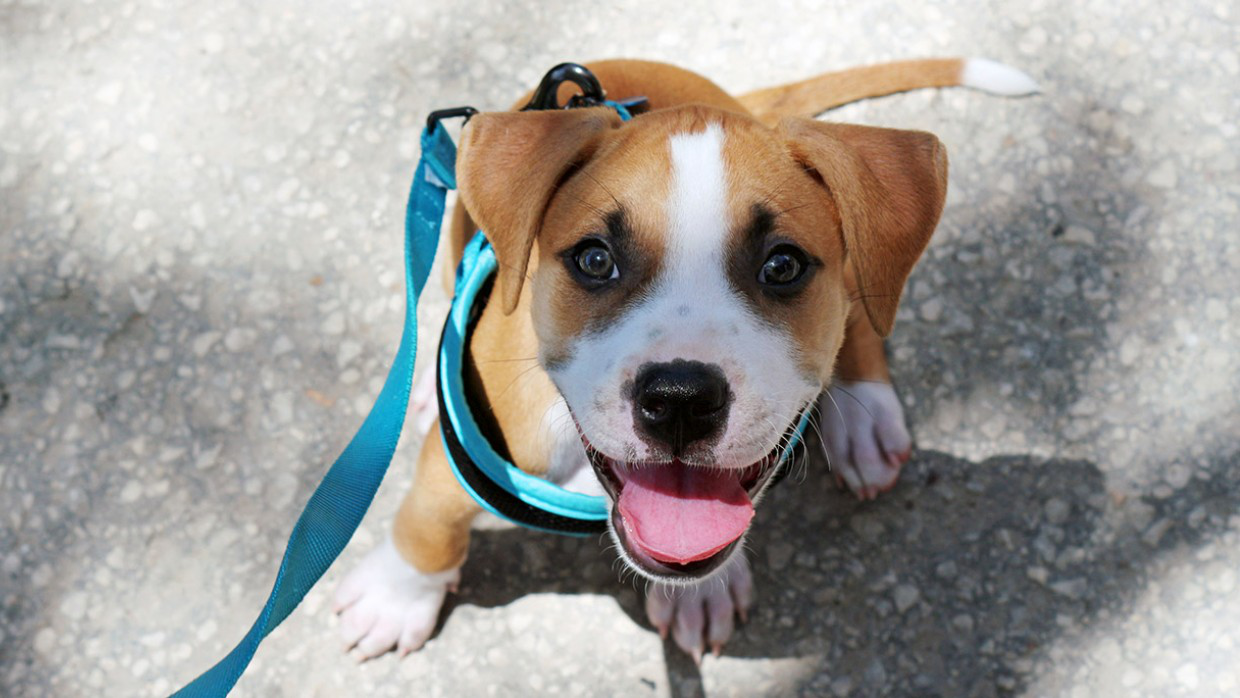

In [ ]:
img

In [ ]:
if (model.predict(x) > 0.5).astype("int32") == 0:
  print ('cat')
else:
  print ('dog')

dog


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
